In [1]:
from pyiron import Project
from wmaee.codes.pyiron.pyiron_GRACE_job import Grace
import matplotlib.pyplot as plt
import numpy as np

pr = Project('test_GRACE')

# Static calculations

In [2]:
job = pr.create_job(
    job_type=Grace, 
    job_name='GRACE_test_static_local', 
    # delete_existing_job=True
)
job.structure = pr.create.structure.bulk('Mo', a=4)
job.calc_static()
job.run()

2025-09-29 23:14:46,605 - pyiron_log - WARNING - The job GRACE_test_static_local is being loaded instead of running. To re-run use the argument 'delete_existing_job=True in create_job'


In [3]:
job['input']

/tmp/ipykernel_176538/533083478.py:1: DeprecationWarning: pyiron_base.jobs.job.core.__getitem__ is deprecated: Use job.output for results, job.files to access files; job.content to access HDF storage and job.child_project to access children of master jobs..
  job['input']


{'groups': ['generic', 'grace'], 'nodes': ['generic_dict']}

In [4]:
job['output']

/tmp/ipykernel_176538/728594839.py:1: DeprecationWarning: pyiron_base.jobs.job.core.__getitem__ is deprecated: Use job.output for results, job.files to access files; job.content to access HDF storage and job.child_project to access children of master jobs..
  job['output']


{'groups': ['generic', 'structure'], 'nodes': []}

# Structure optimization

## local job

In [5]:
job = pr.create_job(
    job_type=Grace, 
    job_name='GRACE_test_minimize_local', 
    # delete_existing_job=True
)
job.structure = pr.create.structure.bulk('Mo', a=4)
job.calc_minimize(ionic_force_tolerance=1e-4, relax_cell=True)
job.run()

/opt/conda/envs/pyiron/lib/python3.11/site-packages/pyiron_base/storage/parameters.py:286: UserWarning: The input in GenericParameters changed, while the state of the job was already finished.
  warnings.warn(
2025-09-29 23:14:46,805 - pyiron_log - WARNING - The job GRACE_test_minimize_local is being loaded instead of running. To re-run use the argument 'delete_existing_job=True in create_job'


In [6]:
job['input']

/tmp/ipykernel_176538/533083478.py:1: DeprecationWarning: pyiron_base.jobs.job.core.__getitem__ is deprecated: Use job.output for results, job.files to access files; job.content to access HDF storage and job.child_project to access children of master jobs..
  job['input']


{'groups': ['generic', 'grace'], 'nodes': ['generic_dict']}

In [7]:
job['output']

/tmp/ipykernel_176538/728594839.py:1: DeprecationWarning: pyiron_base.jobs.job.core.__getitem__ is deprecated: Use job.output for results, job.files to access files; job.content to access HDF storage and job.child_project to access children of master jobs..
  job['output']


{'groups': ['generic', 'structure'], 'nodes': []}

## remote job

In [8]:
remote = pr.create_job(
    job_type=Grace, 
    job_name='GRACE_test_minimize_remote', 
    # delete_existing_job=True
)
remote.structure = pr.create.structure.bulk('Al', a=4.2, cubic=True)
remote.calc_minimize(relax_cell=True)
remote.fmax = 1e-4
# pr.switch_cluster('mul-hpc_81')
# remote.server.queue = 'E5-2690'
pr.switch_cluster('mul-hpc_2023')
remote.server.queue = 'p2gpu'
remote.run(run_mode='queue')

2025-09-29 23:14:47,007 - pyiron_log - WARNING - The job GRACE_test_minimize_remote is being loaded instead of running. To re-run use the argument 'delete_existing_job=True in create_job'


In [9]:
remote['input']

/tmp/ipykernel_176538/1725304095.py:1: DeprecationWarning: pyiron_base.jobs.job.core.__getitem__ is deprecated: Use job.output for results, job.files to access files; job.content to access HDF storage and job.child_project to access children of master jobs..
  remote['input']


{'groups': ['generic', 'grace'], 'nodes': ['generic_dict']}

In [10]:
remote.run()

2025-09-29 23:14:47,092 - pyiron_log - WARNING - The job GRACE_test_minimize_remote is being loaded instead of running. To re-run use the argument 'delete_existing_job=True in create_job'


In [11]:
remote['output']

/tmp/ipykernel_176538/4134057149.py:1: DeprecationWarning: pyiron_base.jobs.job.core.__getitem__ is deprecated: Use job.output for results, job.files to access files; job.content to access HDF storage and job.child_project to access children of master jobs..
  remote['output']


{'groups': ['generic', 'structure'], 'nodes': []}

/tmp/ipykernel_176538/1836496376.py:5: DeprecationWarning: pyiron_base.jobs.job.core.__getitem__ is deprecated: Use job.output for results, job.files to access files; job.content to access HDF storage and job.child_project to access children of master jobs..
  ax[1].plot(remote['output/generic/max_force'])


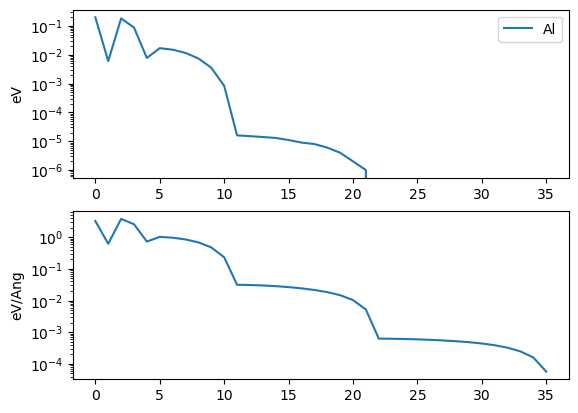

In [12]:
fig, ax = plt.subplots(2,1)
# ax[0].plot(job.output.energy_pot-job.output.energy_pot[-1], label='Mo')
ax[0].plot(remote.output.energy_pot-remote.output.energy_pot[-1], label='Al')
# ax[1].plot(job['output/generic/max_force'])
ax[1].plot(remote['output/generic/max_force'])
ax[0].legend()
ax[0].set_yscale('log')
ax[1].set_yscale('log')
ax[0].set_ylabel('eV')
ax[1].set_ylabel('eV/Ang')
plt.show()

## remote job with fixes

In [13]:
from wmaee.codes.pyiron.pyiron_GRACE_job import Grace

remote = pr.create_job(
    job_type=Grace, 
    job_name='GRACE_test_minimize_remote_fixes',
    # delete_existing_job=True
)
remote.structure = pr.create.structure.bulk('Al', a=4.05, cubic=True)*(3,3,3)
random_shifts = np.random.uniform(-0.3, 0.3, size=remote.structure.positions.shape)
remote.structure.positions += random_shifts
remote.calc_minimize(relax_cell=False)
remote.fmax = 1e-3
remote.input['fix_imports'] = 'from ase.constraints import FixAtoms'
remote.input['fixes'] = 'FixAtoms(indices=[a.index for a in struct if a.y<5])'
pr.switch_cluster('mul-hpc_2023')
remote.server.queue = 'p2gpu'
remote.run(run_mode='queue')

2025-09-29 23:14:47,485 - pyiron_log - WARNING - The job GRACE_test_minimize_remote_fixes is being loaded instead of running. To re-run use the argument 'delete_existing_job=True in create_job'


In [14]:
remote.run()

2025-09-29 23:14:47,554 - pyiron_log - WARNING - The job GRACE_test_minimize_remote_fixes is being loaded instead of running. To re-run use the argument 'delete_existing_job=True in create_job'


In [24]:
remote.animate_structures()

NGLWidget(max_frame=85)

# Molecular dynamics

In [16]:
job = pr.create_job(
    job_type=Grace, 
    job_name='GRACE_test_MD_local',
    # delete_existing_job=True
)
job.structure = pr.create.structure.bulk('W', a=3, cubic=True)*(3,3,3)
job.calc_md(temperature=1000, n_ionic_steps=1000, n_print=10)
job.run()

2025-09-29 23:14:47,721 - pyiron_log - WARNING - The job GRACE_test_MD_local is being loaded instead of running. To re-run use the argument 'delete_existing_job=True in create_job'


In [17]:
job['input']

/tmp/ipykernel_176538/533083478.py:1: DeprecationWarning: pyiron_base.jobs.job.core.__getitem__ is deprecated: Use job.output for results, job.files to access files; job.content to access HDF storage and job.child_project to access children of master jobs..
  job['input']


{'groups': ['generic', 'grace'], 'nodes': ['generic_dict']}

In [18]:
job['output']

/tmp/ipykernel_176538/728594839.py:1: DeprecationWarning: pyiron_base.jobs.job.core.__getitem__ is deprecated: Use job.output for results, job.files to access files; job.content to access HDF storage and job.child_project to access children of master jobs..
  job['output']


{'groups': ['generic', 'structure'], 'nodes': []}

/tmp/ipykernel_176538/3763899619.py:2: DeprecationWarning: pyiron_base.jobs.job.core.__getitem__ is deprecated: Use job.output for results, job.files to access files; job.content to access HDF storage and job.child_project to access children of master jobs..
  ax[0].plot(job['output/generic/time'], job.output.energy_pot, label='E_{pot}')
/tmp/ipykernel_176538/3763899619.py:3: DeprecationWarning: pyiron_base.jobs.job.core.__getitem__ is deprecated: Use job.output for results, job.files to access files; job.content to access HDF storage and job.child_project to access children of master jobs..
  ax[0].plot(job['output/generic/time'], job['output/generic/energy_tot'], label='E_{tot}')
/tmp/ipykernel_176538/3763899619.py:4: DeprecationWarning: pyiron_base.jobs.job.core.__getitem__ is deprecated: Use job.output for results, job.files to access files; job.content to access HDF storage and job.child_project to access children of master jobs..
  ax[0].plot(job['output/generic/time'], job['outp

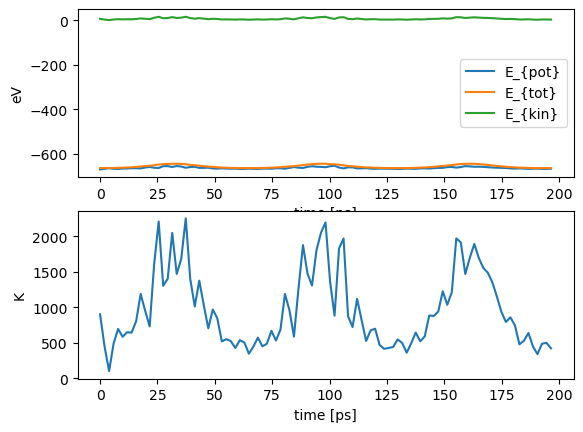

In [19]:
fig, ax = plt.subplots(2,1)
ax[0].plot(job['output/generic/time'], job.output.energy_pot, label='E_{pot}')
ax[0].plot(job['output/generic/time'], job['output/generic/energy_tot'], label='E_{tot}')
ax[0].plot(job['output/generic/time'], job['output/generic/energy_kin'], label='E_{kin}')
ax[1].plot(job['output/generic/time'], job['output/generic/temperature'])
ax[0].legend()
ax[0].set_ylabel('eV')
ax[1].set_ylabel('K')
ax[0].set_xlabel('time [ps]')
ax[1].set_xlabel('time [ps]')
plt.show()

## Example with local fixes

More info: [https://wiki.fysik.dtu.dk/ase/ase/constraints.html](https://wiki.fysik.dtu.dk/ase/ase/constraints.html)

In [20]:
job = pr.create_job(
    job_type=Grace, 
    job_name='GRACE_test_MD_fix_remote',
    # delete_existing_job=True
)
job.structure = pr.create.structure.bulk('W', a=3, cubic=True)*(3,3,3)
job.calc_md(grace_model='GRACE-1L-OAM', temperature=1000, n_ionic_steps=1000, n_print=10)
job.input['fix_imports'] = 'from ase.constraints import FixAtoms'
job.input['fixes'] = 'FixAtoms(indices=[a.index for a in struct if a.y<5])'

pr.switch_cluster('mul-hpc_2023')
job.server.queue = 'p2gpu'
job.run(run_mode='queue')

2025-09-29 23:14:48,054 - pyiron_log - WARNING - The job GRACE_test_MD_fix_remote is being loaded instead of running. To re-run use the argument 'delete_existing_job=True in create_job'


In [21]:
job.run()

2025-09-29 23:14:48,086 - pyiron_log - WARNING - The job GRACE_test_MD_fix_remote is being loaded instead of running. To re-run use the argument 'delete_existing_job=True in create_job'


In [23]:
job.animate_structures()

NGLWidget(max_frame=100)